In [15]:
pip install colorthief

Note: you may need to restart the kernel to use updated packages.


In [41]:
import os
import numpy as np
from colorthief import ColorThief
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [65]:
def extract_features(image_path):
    ct = ColorThief(image_path)
    dominant_color = ct.get_color(quality=1)
    palette = ct.get_palette(color_count=7)
    return np.concatenate([dominant_color, np.array(palette).flatten()])

In [17]:
train_folder = "train"

In [10]:
X = []
y = []

In [18]:
print(df_train.head())

           Image          Class
0  image3476.jpg  Miscellaneous
1  image5198.jpg         Candle
2  image4183.jpg        Snowman
3  image1806.jpg  Miscellaneous
4  image7831.jpg  Miscellaneous


In [19]:
for filename in os.listdir(train_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(train_folder, filename)
        features = extract_features(image_path)
        X.append(features)
        # Assuming image labels are encoded in filenames (e.g., "label_image.jpg")
        label = filename.split("_")[0]  # Extract label from filename
        y.append(label)

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn_classifier.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.41294838145231844


In [66]:
sample_image_path = os.path.join(train_folder, os.listdir(train_folder)[3])
sample_features = extract_features(sample_image_path)
dominant_color = sample_features[:3]
palette = sample_features[3:].reshape((-1, 3))

(-0.5, 79.5, 59.5, -0.5)

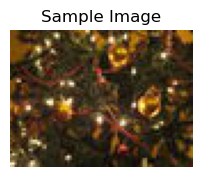

In [67]:
sample_image = plt.imread(sample_image_path)
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(sample_image)
plt.title("Sample Image")
plt.axis('off')

(-0.5, 0.5, 0.5, -0.5)

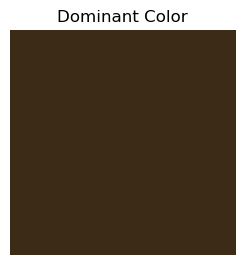

In [68]:
plt.subplot(1, 2, 1)
plt.imshow([[dominant_color / 255]])
plt.title("Dominant Color")
plt.axis('off')

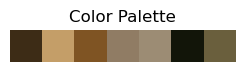

In [69]:
plt.subplot(1, 2, 2)
plt.imshow([palette / 255])
plt.title("Color Palette")
plt.axis('off')
plt.show()